Author: Brian Erichsen Fagundes
MSD CS 6017 - Summer - 2024
May - 24 - 2024

Python intro and simple statistics - HW1

Write functions to compute the mean, and standard deviation of a list of data

In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

def compute_mean(data):
    return sum(data) / len(data)

def compute_std(data):
    mean = compute_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return np.sqrt(variance)

Use scipy.stats.norm to sample from the normal(gaussian) distribution. Compute the mean, and standard deviation of your set of samples using your functions, and with the built in numpy methods. Verify you get the expected results (you know what these values should be if you sample from a normal distribution).

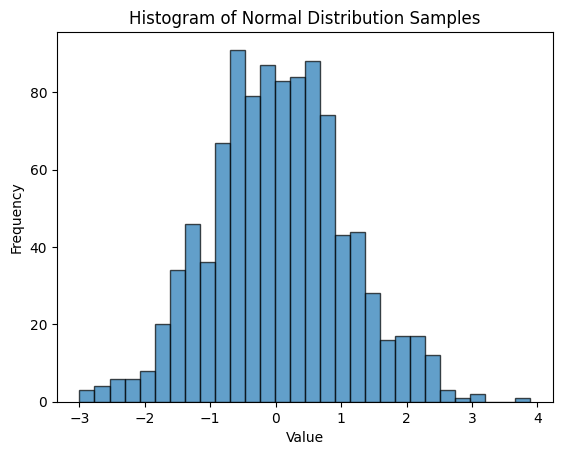

In [23]:
#normal distribution is 0; standard deviation is 1 and 1000 random samples
samples = stats.norm.rvs(loc=0, scale=1, size=1000)

# compute mean and std by using my own methods
custom_mean = compute_mean(samples)
custom_std = compute_std(samples)

# compute mean and std by using in built methods
numpy_mean = np.mean(samples)
numpy_std = np.std(samples)

# asserts that both results are nearly identical
assert np.isclose(custom_mean, numpy_mean, atol=0.01)
assert np.isclose(custom_std, numpy_std, atol=0.01)

# plotting histogram values
plt.hist(samples, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Normal Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Grab a year's worth of hourly SLC PM2.5 data in CSV form.

Pick one of the monitoring stations from the dataset and perform your analysis from the readings from that station.

Plot the readings from that station over the course of a year

                     Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
Date                                                                  
2020-01-01 00:00:00        20.9        10.5         3.4         7.5   
2020-01-01 01:00:00        22.7        11.1         3.9         8.1   
2020-01-01 02:00:00        19.4        12.4         5.6         5.3   
2020-01-01 03:00:00        20.8        10.8         5.7         5.1   
2020-01-01 04:00:00        19.3        10.9         6.5         9.5   

                     Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
Date                                                                  
2020-01-01 00:00:00         8.5         7.8        18.2         7.2   
2020-01-01 01:00:00         8.3         6.2        16.4         7.2   
2020-01-01 02:00:00         8.7         6.1        16.9         5.3   
2020-01-01 03:00:00         6.9         4.4        17.2         3.9   
2020-01-01 04:00:00         4.8         2.3        12.9         4.7   

    

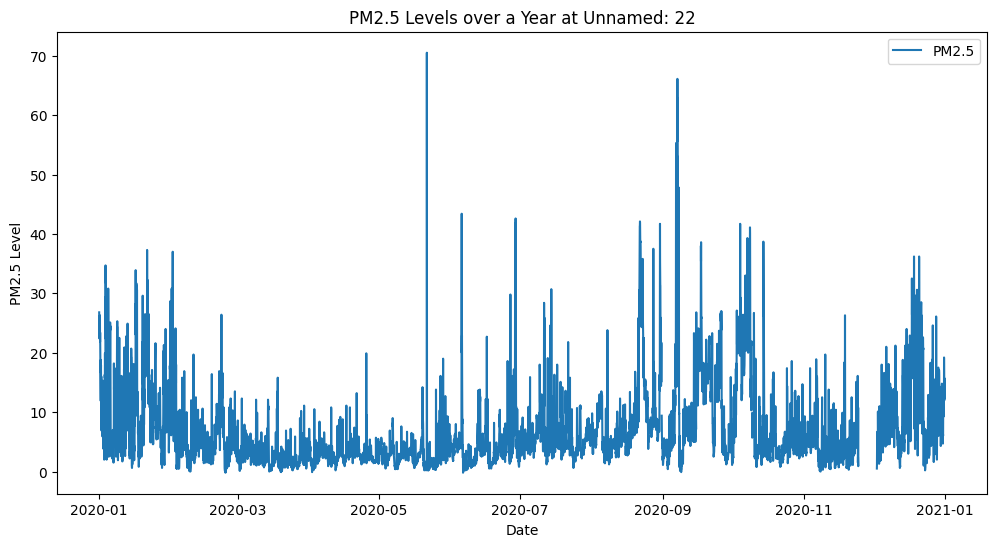

In [24]:
# Load data
df = pd.read_csv('2020-PM2.5.csv', header=2, parse_dates=['Date'], index_col='Date')
print(df.head())
print(df.columns)
station_name = 'Unnamed: 22'
station_data = df[[station_name]]

# Plotting yearly data for a specific station
plt.figure(figsize=(12, 6))
plt.plot(station_data.index, station_data[station_name], label='PM2.5')
plt.title(f'PM2.5 Levels over a Year at {station_name}')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()

Plot the mean pm2.5 level for each month using a bar chart. Note any insights you can gain from this visualization.

/var/folders/vz/hr6jrn1n0ggf1mxbfs500y4m0000gn/T/ipykernel_4146/3253692069.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = station_data.resample('M').mean()


<Figure size 1000x600 with 0 Axes>

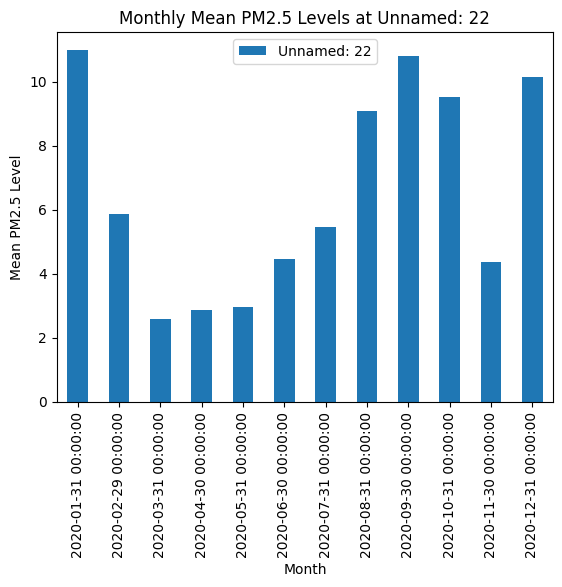

In [25]:
#Plotting monthly means PM2.5 levels
monthly_mean = station_data.resample('M').mean()

plt.figure(figsize=(10, 6))
monthly_mean.plot(kind='bar')
plt.title(f'Monthly Mean PM2.5 Levels at {station_name}')
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 Level')
plt.show()

# Insights from visualization
# Higher pollution levels in winter months due to temperature inversions

Analysis of the graph: Higher pollution levels in winter months due to temperature inversions

Next, group the data by time of day (by hour), and plot the mean pollution level for each hour. What insights can you draw from this view of the data?

<Figure size 1000x600 with 0 Axes>

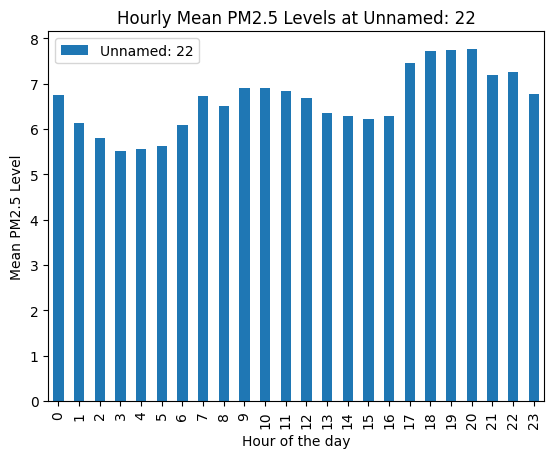

In [26]:
#Plotting hourly mean data
hourly_mean = station_data.groupby(station_data.index.hour).mean()

plt.figure(figsize=(10, 6))
hourly_mean.plot(kind='bar')
plt.title(f'Hourly Mean PM2.5 Levels at {station_name}')
plt.xlabel('Hour of the day')
plt.ylabel('Mean PM2.5 Level')
plt.show()

# Insights from visualization
# Higher pollution levels during mornings and evening rush hours

Analysis: Higher pollution levels during mornings and evening rush hours

The mean only gives us a very coarse view of the monthly/hourly data. Use Box and Whisker plots of the monthly and hourly data groupings to provide a more complete view of the data. Does this view provide any additional insights?

/var/folders/vz/hr6jrn1n0ggf1mxbfs500y4m0000gn/T/ipykernel_4146/226656702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Month'] = station_data.index.month


<Figure size 1000x600 with 0 Axes>

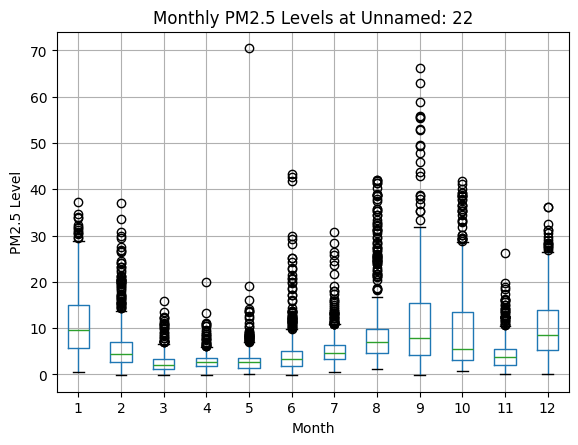

In [27]:
#  More complete view of the data -- monthly
station_data['Month'] = station_data.index.month
plt.figure(figsize=(10, 6))
station_data.boxplot(column=station_name, by='Month', layout=(1, 1))
plt.title(f'Monthly PM2.5 Levels at {station_name}')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.suptitle('')
plt.show()

Analysis:

/var/folders/vz/hr6jrn1n0ggf1mxbfs500y4m0000gn/T/ipykernel_4146/510835789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Hour'] = station_data.index.hour


<Figure size 1000x600 with 0 Axes>

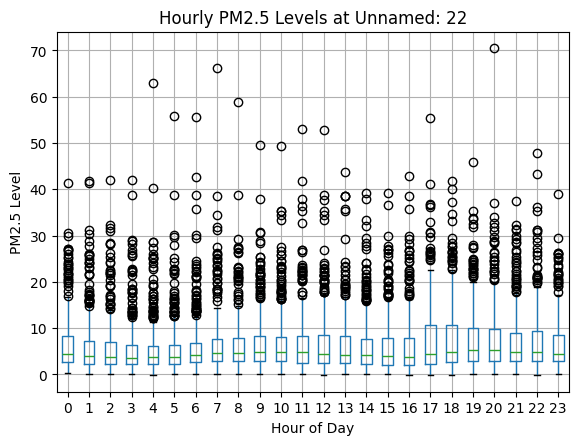

In [28]:
# More complex view of the data -- hourly
station_data['Hour'] = station_data.index.hour
plt.figure(figsize=(10, 6))
station_data.boxplot(column=station_name, by='Hour', layout=(1, 1))
plt.title(f'Hourly PM2.5 Levels at {station_name}')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Level')
plt.suptitle('')
plt.show()

Analysis: